# Introduction

# Preliminary Results

### Importing and Wrangling

In [22]:
library(tidyverse)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [12]:
# load data from online
data <- read_csv("https://raw.githubusercontent.com/sam-coble/stat200-project/main/vancouver_harbour_weather.csv") |>
    select("Year", "Max Temp (°C)", "Min Temp (°C)", "Mean Temp (°C)", "Total Precip (mm)")
# Rename columns
colnames(data) <- c("yr", "max", "min", "mean", "precip")

# Seperate data into two groups
old_temps <- data |>
    filter(!is.na(max) & !is.na(min) & !is.na(mean) & !is.na(precip)) |>
    filter(yr < 1987) |>
    select(!yr)
new_temps <- data |>
    filter(!is.na(max) & !is.na(min) & !is.na(mean) & !is.na(precip)) |>
    filter(yr > 2011) |>
    select(!yr)

head(old_temps)
head(new_temps)

Rows: 8036 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): Station Name, Month, Day, Max Temp Flag, Min Temp Flag, Mean Temp...
dbl  (13): Longitude (x), Latitude (y), Climate ID, Year, Max Temp (°C), Min...
lgl   (3): Data Quality, Dir of Max Gust (10s deg), Spd of Max Gust (km/h)
date  (1): Date/Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


max,min,mean,precip
<dbl>,<dbl>,<dbl>,<dbl>
3.3,0.6,2.0,0.0
7.2,1.1,4.2,14.2
6.7,5.0,5.9,3.3
6.7,2.2,4.5,0.0
4.4,1.1,2.8,0.0
5.6,3.3,4.5,0.0


max,min,mean,precip
<dbl>,<dbl>,<dbl>,<dbl>
7.3,3.5,5.4,0.0
9.5,2.8,6.2,8.6
8.9,7.2,8.1,23.6
11.3,8.2,9.8,19.2
8.9,5.8,7.4,0.6
5.9,4.0,5.0,3.4


### Plots and Tables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


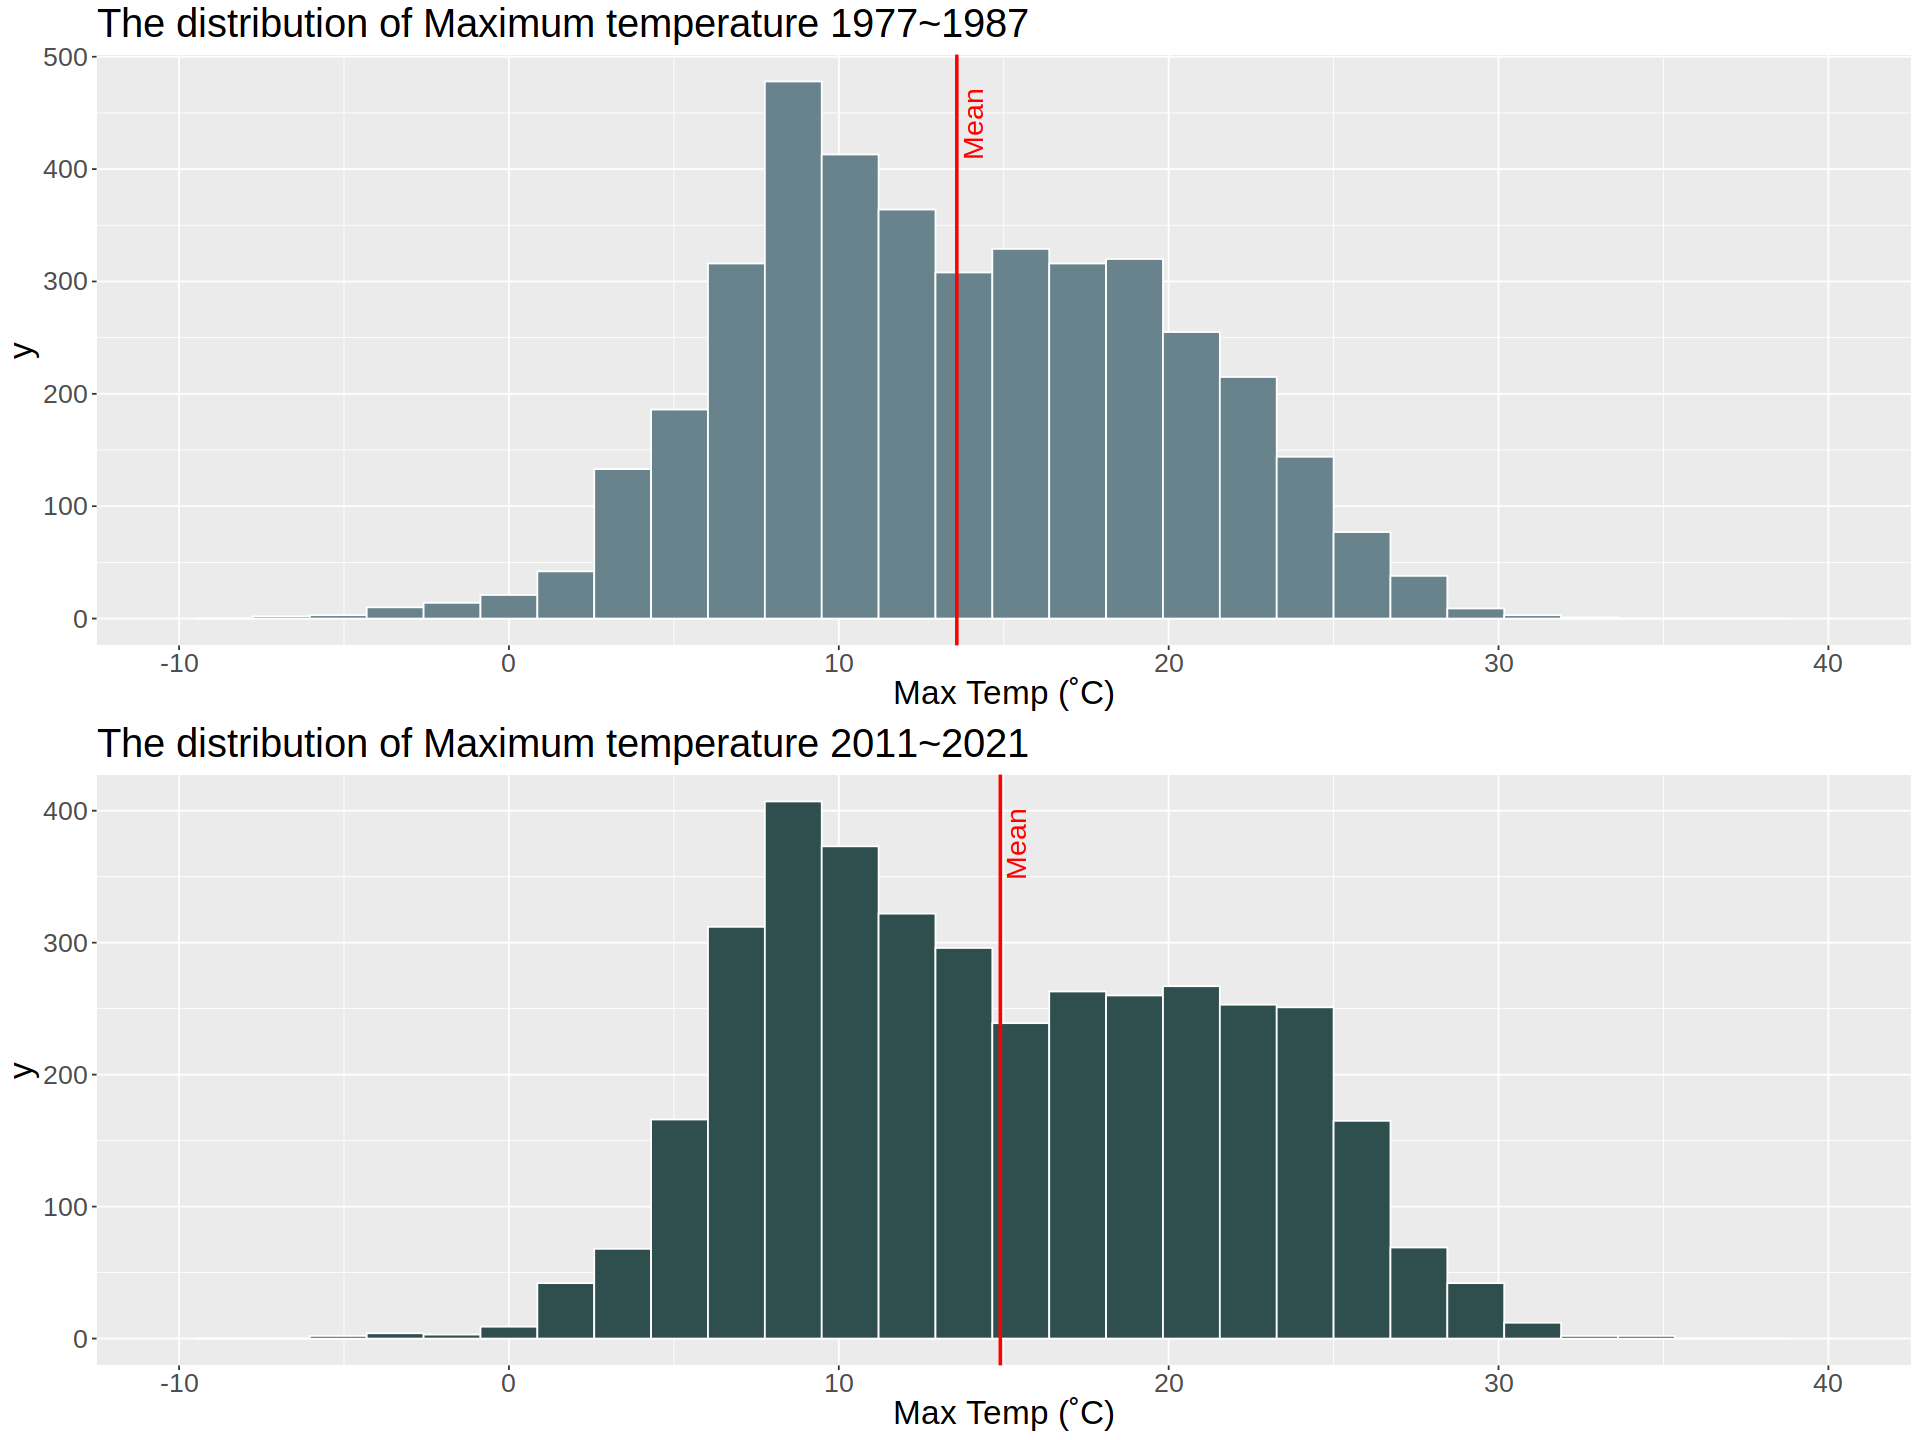

In [129]:
options(repr.plot.width = 16, repr.plot.height = 12)
old_mean=mean(old_temps$max)
new_mean=mean(new_temps$max)
plots <- list()
plots[[1]] <- old_temps |>
    ggplot(aes(x=max)) +
    geom_histogram(color='white', fill='lightblue4')+
    geom_vline(xintercept=old_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 40, by=10),limits=c(-10,40))+
    ggtitle('The distribution of Maximum temperature 1977~1987')+
    xlab('Max Temp (˚C)')+
    annotate("text", x= old_mean+0.5, y=440, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
plots[[2]] <- new_temps |>
    ggplot(aes(x=max)) +
    geom_histogram(color='white', fill='darkslategray')+
    geom_vline(xintercept=new_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 40, by=10),limits=c(-10,40))+
    ggtitle('The distribution of Maximum temperature 2011~2021')+
    xlab('Max Temp (˚C)')+
    annotate("text", x= new_mean+0.5, y=375, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
grid.arrange(grobs=plots, ncol=1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


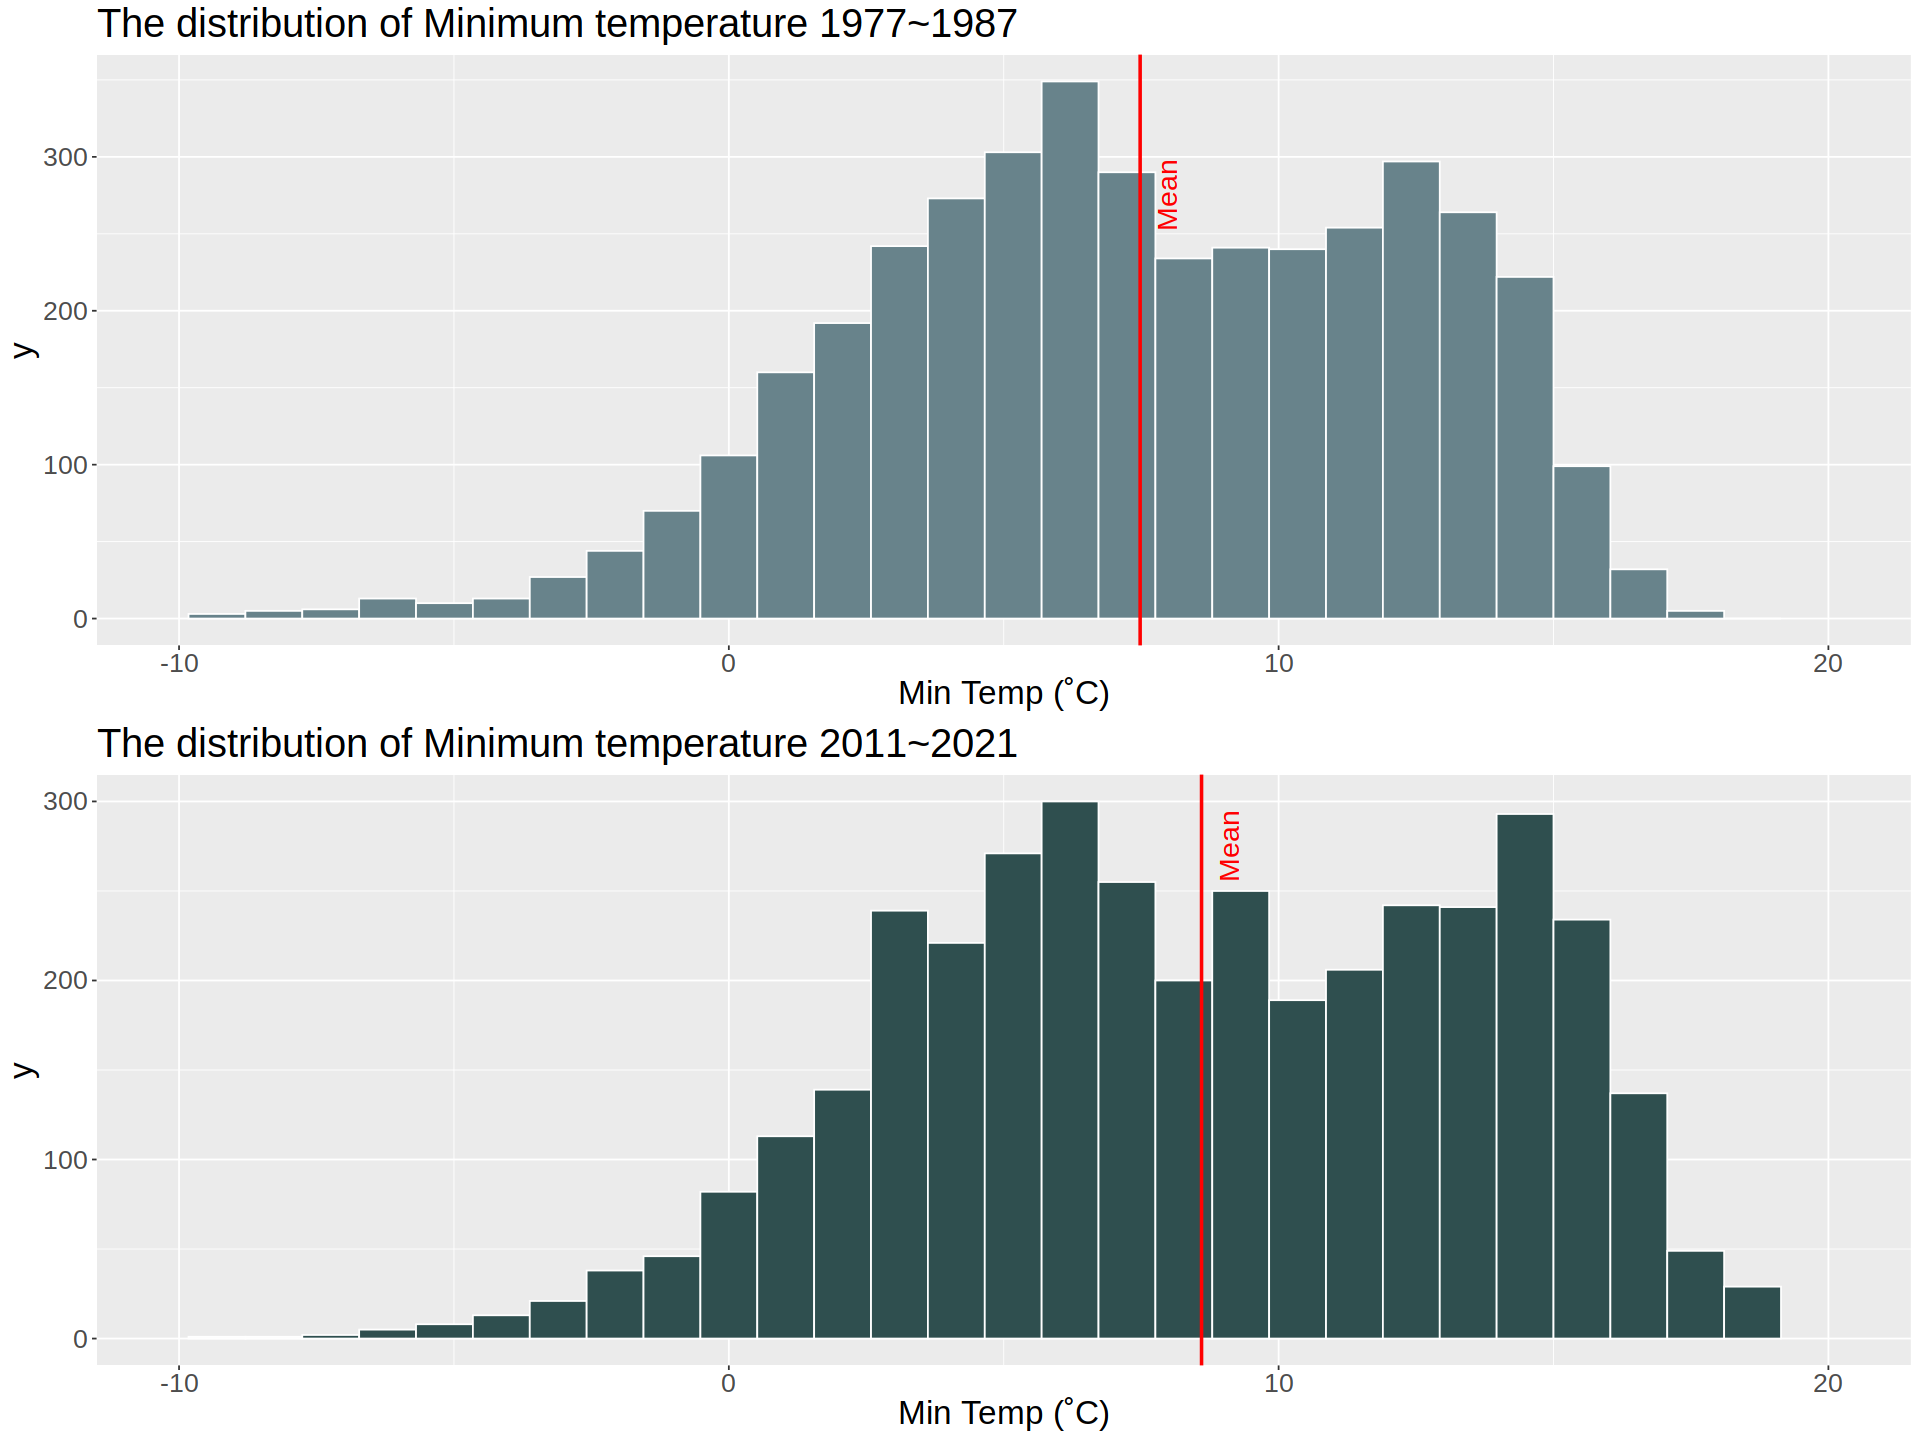

In [130]:
options(repr.plot.width = 16, repr.plot.height = 12)
old_mean=mean(old_temps$min)
new_mean=mean(new_temps$min)
plots <- list()
plots[[1]] <- old_temps |>
    ggplot(aes(x=min)) +
    geom_histogram(color='white', fill='lightblue4')+
    geom_vline(xintercept=old_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 20, by=10),limits=c(-10,20))+
    ggtitle('The distribution of Minimum temperature 1977~1987')+
    xlab('Min Temp (˚C)')+
    annotate("text", x= old_mean+0.5, y=275, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
plots[[2]] <- new_temps |>
    ggplot(aes(x=min)) +
    geom_histogram(color='white', fill='darkslategray')+
    geom_vline(xintercept=new_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 20, by=10),limits=c(-10,20))+
    ggtitle('The distribution of Minimum temperature 2011~2021')+
    xlab('Min Temp (˚C)')+
    annotate("text", x= new_mean+0.5, y=275, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
grid.arrange(grobs=plots, ncol=1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 5 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


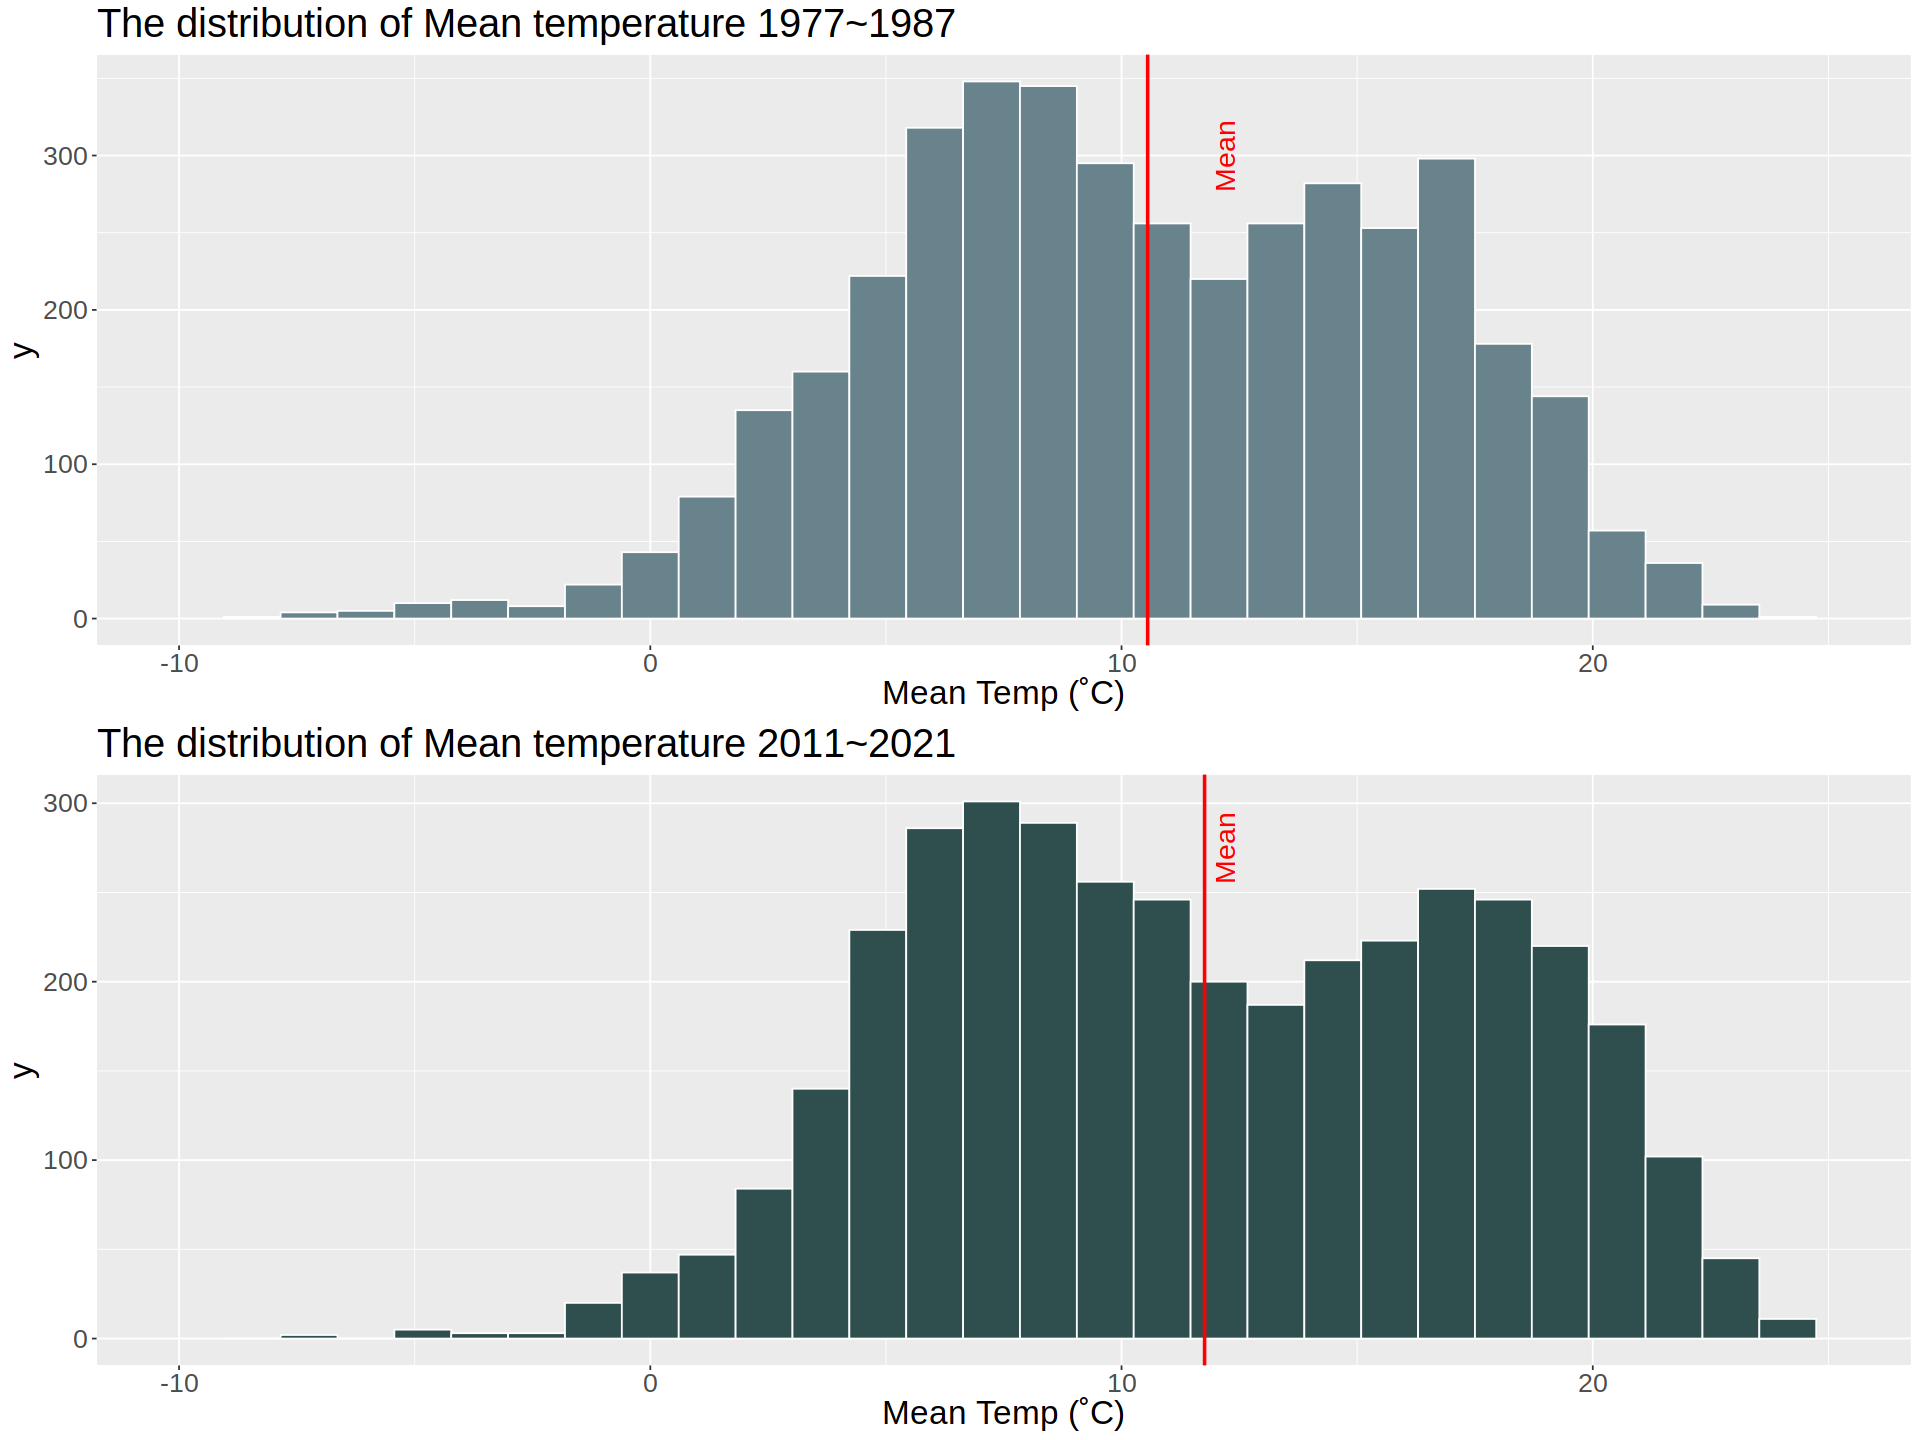

In [131]:
options(repr.plot.width = 16, repr.plot.height = 12)
old_mean=mean(old_temps$mean)
new_mean=mean(new_temps$mean)
plots <- list()
plots[[1]] <- old_temps |>
    ggplot(aes(x=mean)) +
    geom_histogram(color='white', fill='lightblue4')+
    geom_vline(xintercept=old_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 25, by=10),limits=c(-10,25))+
    ggtitle('The distribution of Mean temperature 1977~1987')+
    xlab('Mean Temp (˚C)')+
    annotate("text", x= new_mean+0.45, y=300, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
plots[[2]] <- new_temps |>
    ggplot(aes(x=mean)) +
    geom_histogram(color='white', fill='darkslategray')+
    geom_vline(xintercept=new_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-10, 25, by=10),limits=c(-10,25))+
    ggtitle('The distribution of Mean temperature 2011~2021')+
    xlab('Mean Temp (˚C)')+
    annotate("text", x= new_mean+0.45, y=275, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
grid.arrange(grobs=plots, ncol=1)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 64 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 58 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


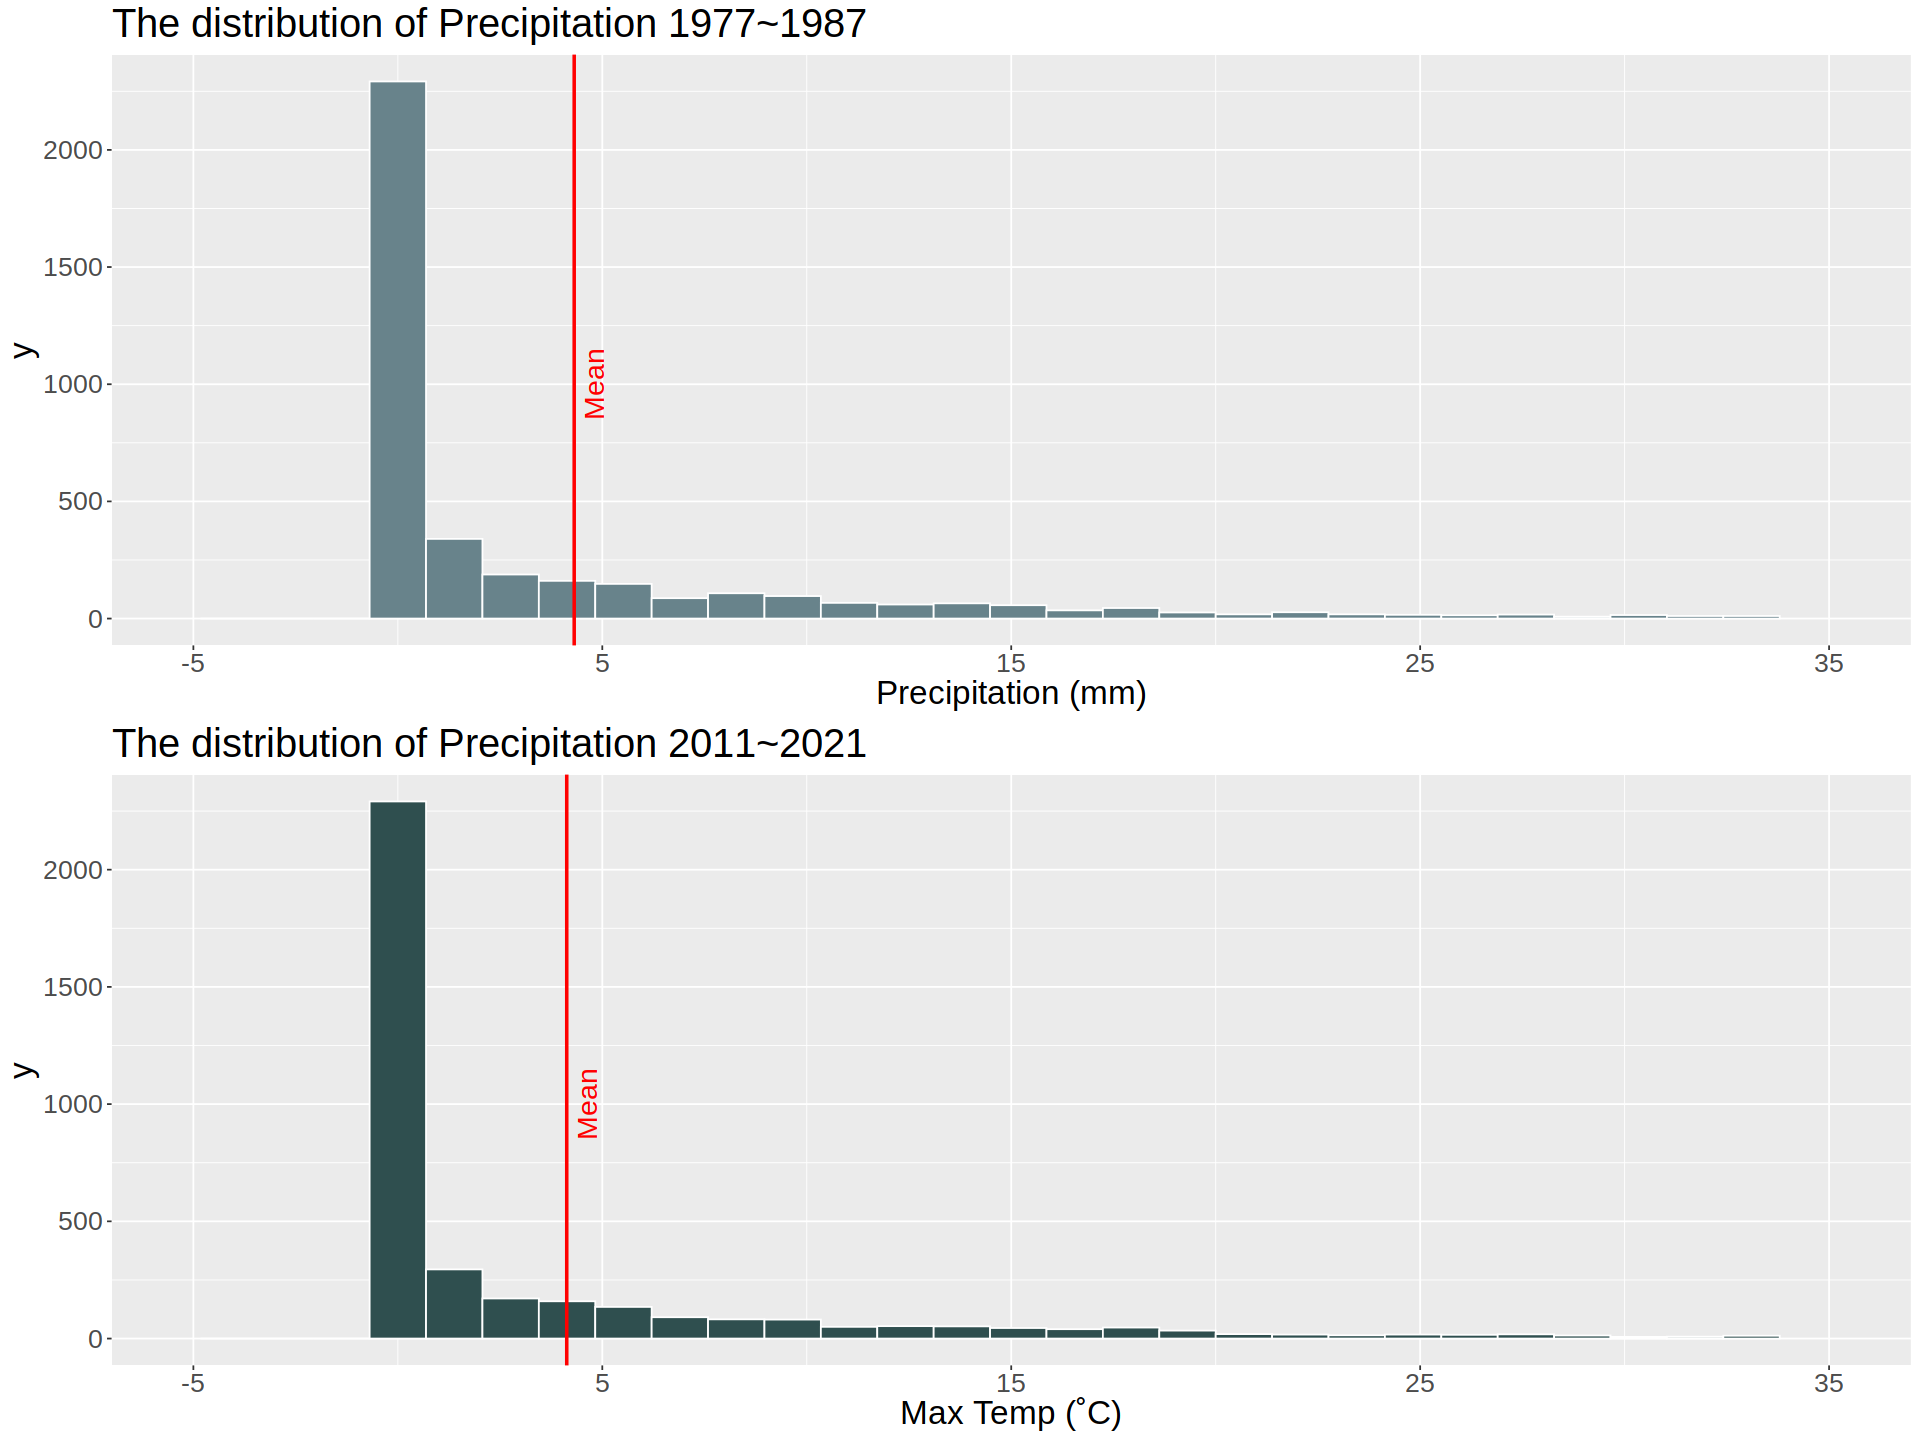

In [132]:
options(repr.plot.width = 16, repr.plot.height = 12)
old_mean=mean(old_temps$precip)
new_mean=mean(new_temps$precip)
plots <- list()
plots[[1]] <- old_temps |>
    ggplot(aes(x=precip)) +
    geom_histogram(color='white', fill='lightblue4')+
    geom_vline(xintercept=old_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-5, 35, by=10),limits=c(-5,35))+
    ggtitle('The distribution of Precipitation 1977~1987')+
    xlab('Precipitation (mm)')+
    annotate("text", x= old_mean+0.5, y=1000, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
plots[[2]] <- new_temps |>
    ggplot(aes(x=precip)) +
    geom_histogram(color='white', fill='darkslategray')+
    geom_vline(xintercept=new_mean, colour='red',linewidth=1)+
    scale_x_continuous(breaks=seq(-5, 35, by=10),limits=c(-5,35))+
    ggtitle('The distribution of Precipitation 2011~2021')+
    xlab('Max Temp (˚C)')+
    annotate("text", x= new_mean+0.5, y=1000, label="Mean", angle=90, color='red', size=6)+
    theme(text = element_text(size = 20))
grid.arrange(grobs=plots, ncol=1)

In [20]:
# Parameters of interest
means <- c(mean(old_temps$max), mean(old_temps$min), mean(old_temps$mean), mean(old_temps$precip),
           mean(new_temps$max), mean(new_temps$min), mean(new_temps$mean), mean(new_temps$precip))
params <- matrix(means, nrow=2, byrow=TRUE)
colnames(params) <- c('Avg. max temp', 'Avg. min temp', 'Avg. mean temp', 'Avg. Precip.')
rownames(params) <- c('1976-86', '2012-22')
round(params, 2)

,Avg. max temp,Avg. min temp,Avg. mean temp,Avg. Precip.
1976-86,13.58,7.48,10.55,4.31
2012-22,14.90,8.60,11.76,4.13


# Methods: Plan

# References

### Dataset:

https://climate.weather.gc.ca/climate_data/hourly_data_e.html?hlyRange=1976-01-20%7C2023-03-07&dlyRange=1925-11-01%7C2023-03-07&mlyRange=1925-01-01%7C2007-02-01&StationID=888&Prov=BC&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2023&selRowPerPage=25&Line=0&searchMethod=contains&Month=3&Day=7&txtStationName=Vancouver+Harbour&timeframe=1&Year=2023